<a href="https://colab.research.google.com/github/Saiviraj/Sai-viraj/blob/ai-project-3/stellar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv("star_classification.csv")

print(df)

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

In [ ]:
print(df.info())
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   class     100000 non-null  object 
 6   redshift  100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB
None


0

In [ ]:
df.describe(include = 'all')

,u,g,r,i,z,class,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN
freq,NaN,NaN,NaN,NaN,NaN,59445,NaN
mean,21.980468,20.531387,19.645762,19.084854,18.668810,NaN,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,NaN,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,NaN,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,NaN,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,NaN,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,NaN,0.704154


In [ ]:
df.drop(columns = ['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   class     100000 non-null  object 
 6   redshift  100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [ ]:
df.drop(index = 79543, inplace = True)
df.describe(include = 'all')

,u,g,r,i,z,class,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN
freq,NaN,NaN,NaN,NaN,NaN,59445,NaN
mean,22.080679,20.631583,19.645777,19.084865,18.768988,NaN,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,NaN,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,NaN,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,NaN,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,NaN,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,NaN,0.704172


In [ ]:
df.describe(include = 'all')

,u,g,r,i,z,class,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN
freq,NaN,NaN,NaN,NaN,NaN,59445,NaN
mean,22.080679,20.631583,19.645777,19.084865,18.768988,NaN,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,NaN,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,NaN,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,NaN,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,NaN,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,NaN,0.704172


<Axes: >

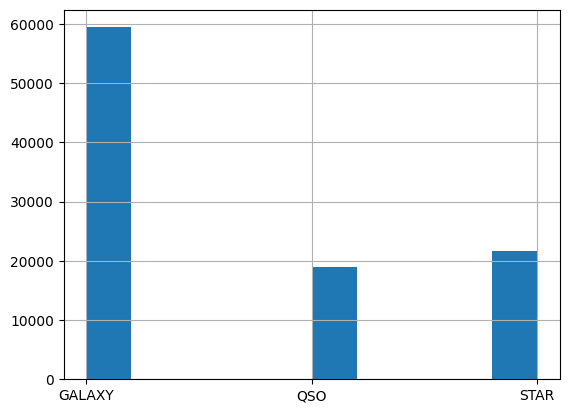

In [ ]:
df['class'].hist()

In [ ]:
y = df['class']
df.drop('class', axis = 1, inplace = True)
df

,u,g,r,i,z,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


<Axes: >

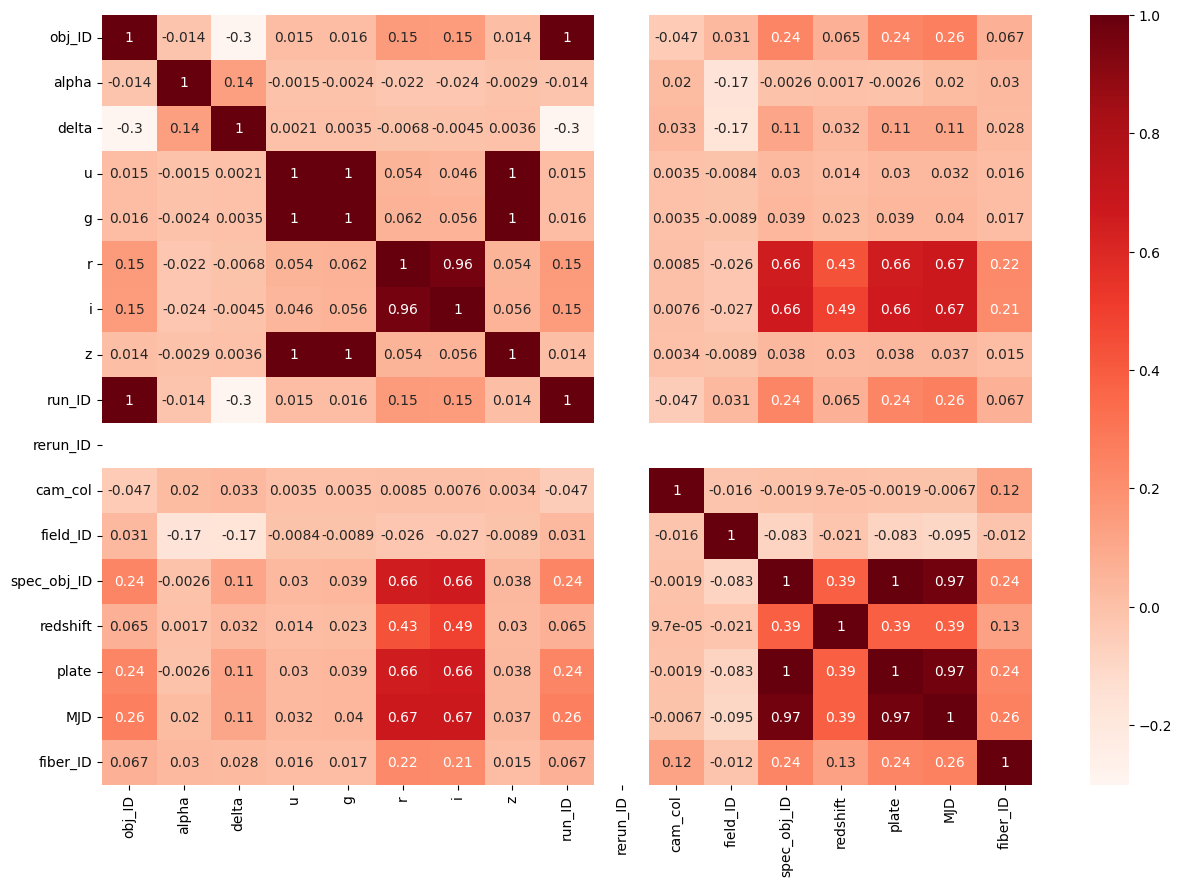

In [ ]:
y = df['class']
df.drop('class', axis = 1, inplace = True)
df
corr = df.corr()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr, cmap = 'Reds', annot = True)

Text(32.517166666666654, 0.5, 'Near-Infrared')

<Figure size 2000x3000 with 0 Axes>

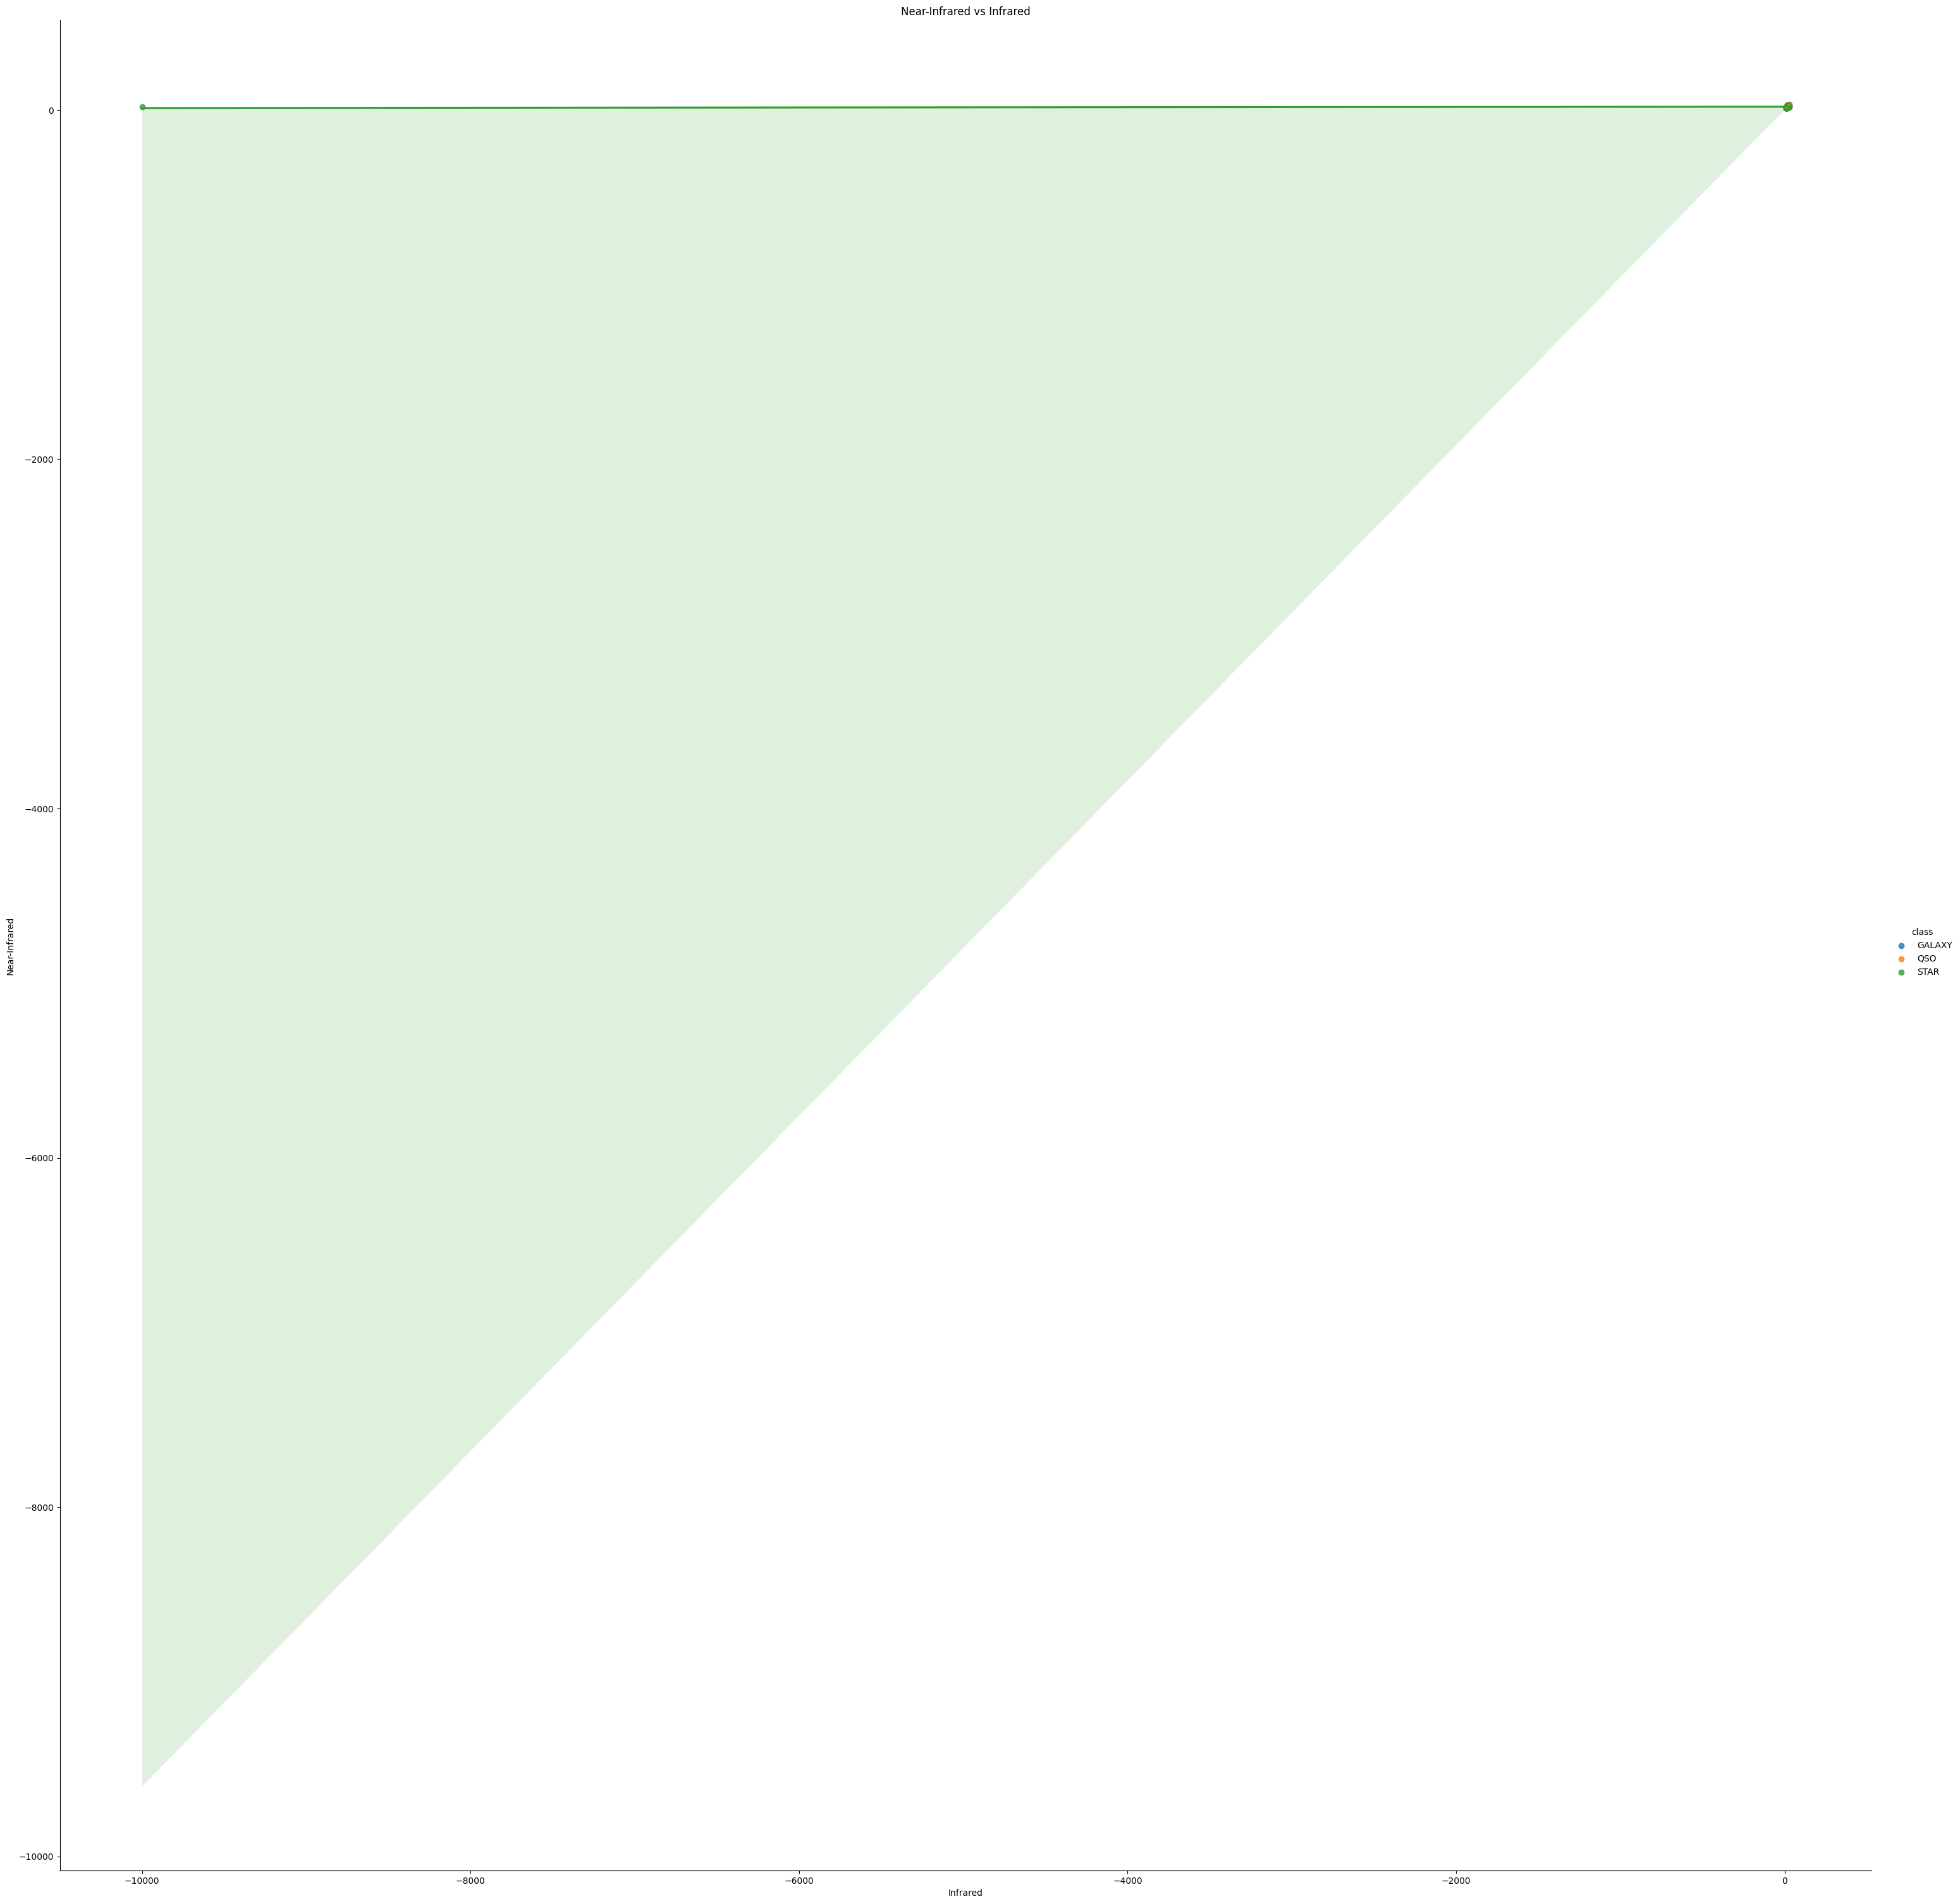

In [ ]:
df['class'] = y
plt.figure(figsize = (20, 30))
sns.lmplot(data = df, x = 'z', y = 'i', hue = 'class', height = 30)
plt.title('Near-Infrared vs Infrared')
plt.xlabel('Infrared')
plt.ylabel('Near-Infrared')

Text(0, 0.5, 'Green Light')

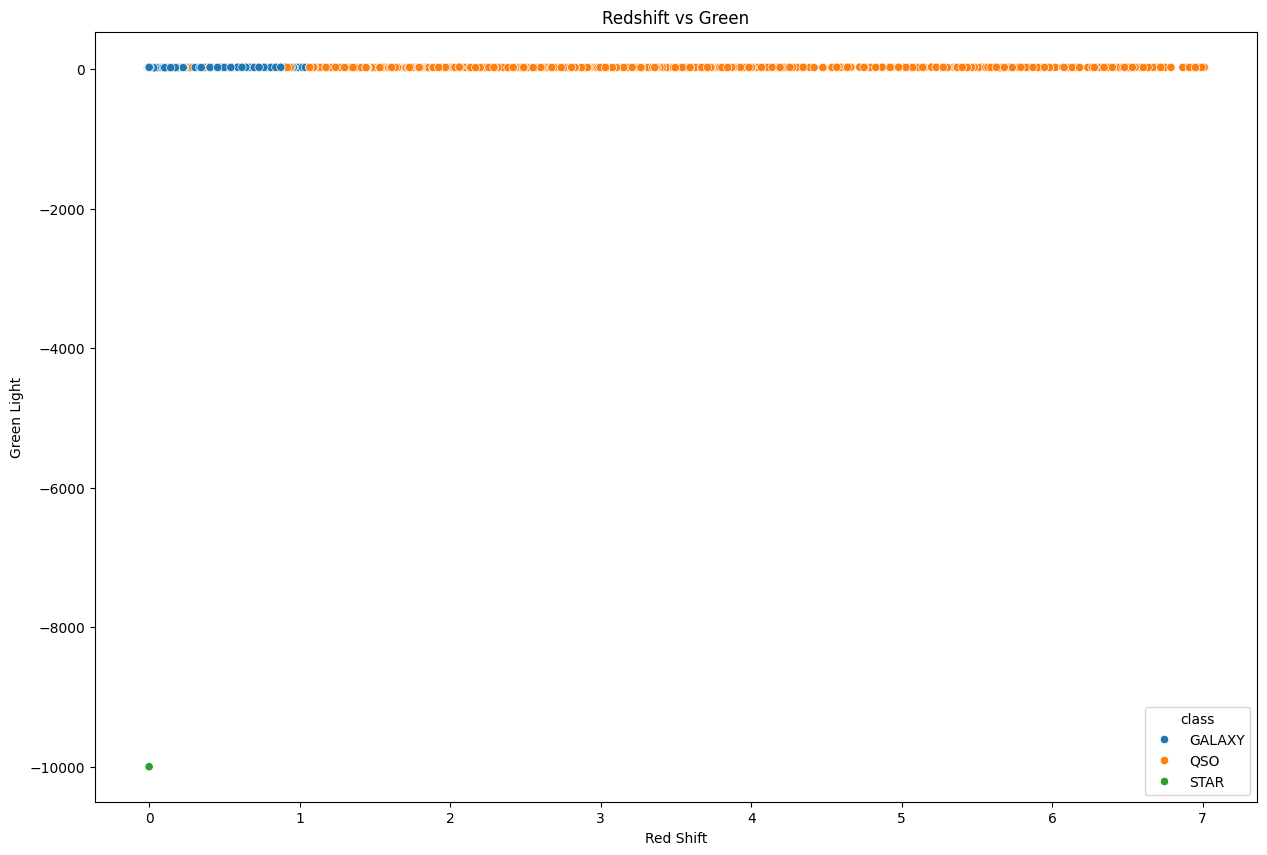

In [ ]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = df['redshift'], y = df['g'], hue = df['class'])
plt.title('Redshift vs Green')
plt.xlabel('Red Shift')
plt.ylabel('Green Light')

Text(0, 0.5, 'Red Light')

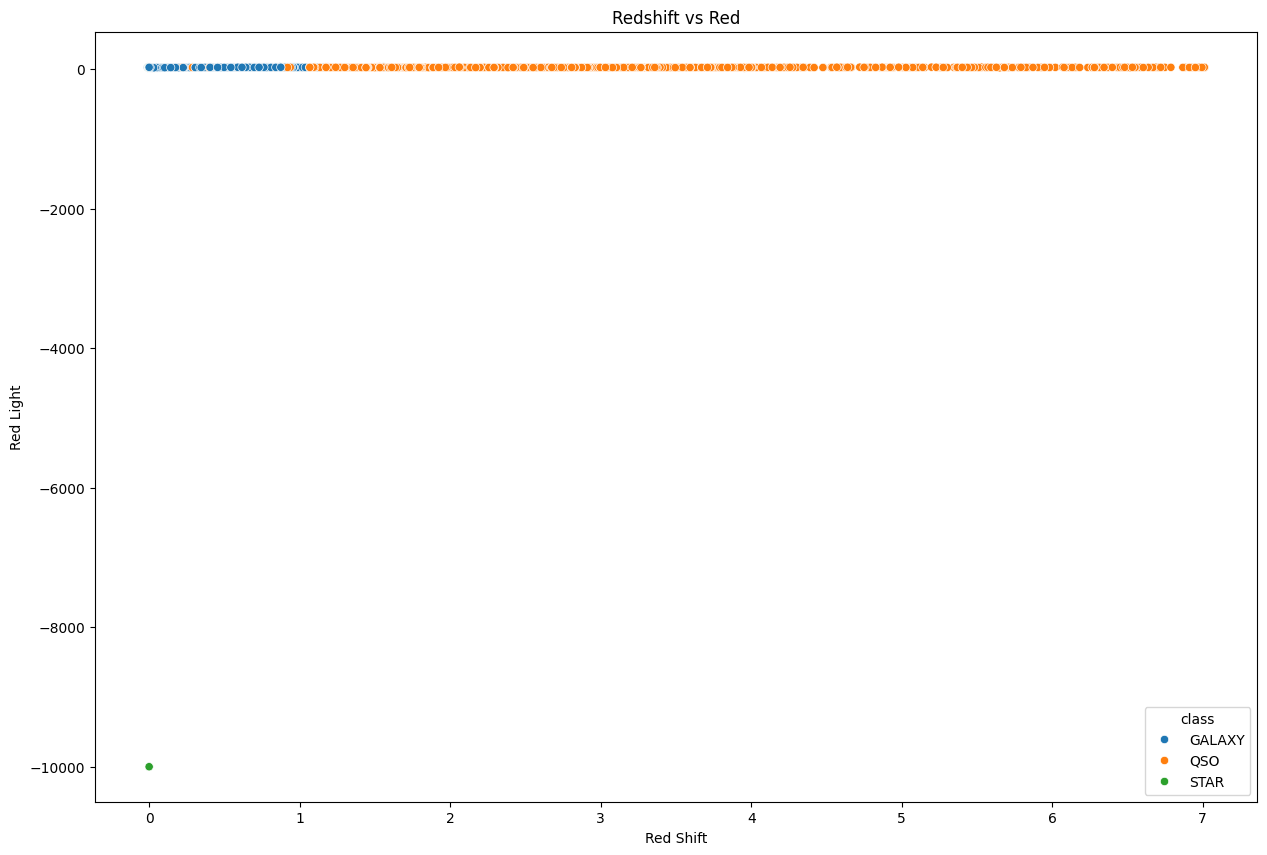

In [ ]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = df['redshift'], y = df['g'], hue = df['class'])
plt.title('Redshift vs Red')
plt.xlabel('Red Shift')
plt.ylabel('Red Light')

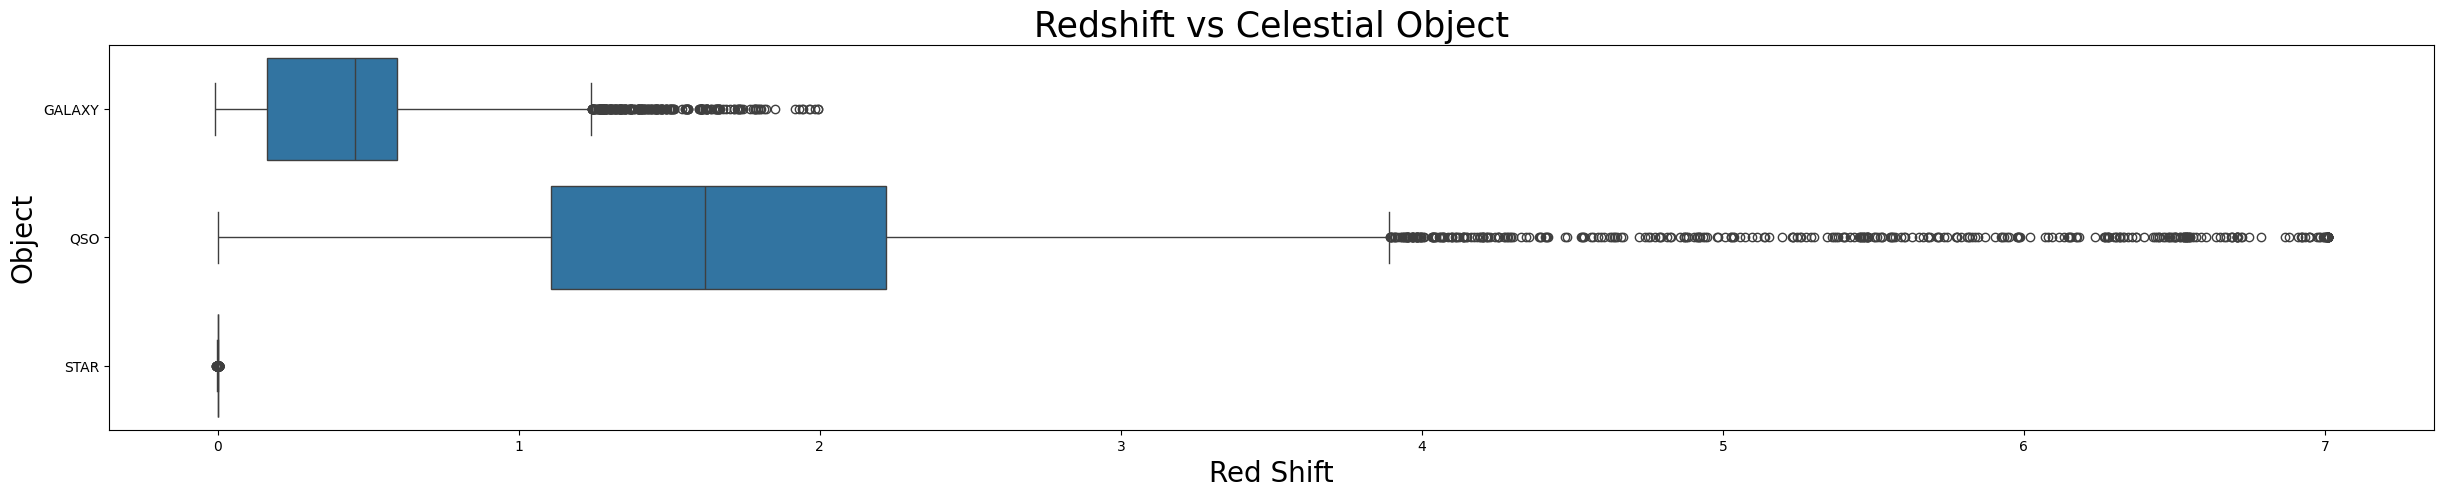

In [ ]:
import pandas as pd
df = pd.read_csv("star_classification.csv")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30, 5))
sns.boxplot(data = df, x = "redshift", y = "class")
plt.title('Redshift vs Celestial Object', fontsize = 25)
plt.xlabel('Red Shift', fontsize = 20)
plt.ylabel('Object', fontsize = 20)
plt.savefig('Redshift and Object.png', dpi = 300, transparent = True, bbox_inches = 'tight')